<h1 size=6>Clustering high-throughput x-ray diffraction of VO2-Nb2O2 as a function of temperature</h1>

<font size=12>Introduction</font>

<font size=6>Vanadium(IV) Oxide</font>

First lets define how the characteristics of certain crystal structure will influence the defraction patterns of a material

VO2 Monoclinic characteristics:
<ul>
<li>Broad peaks - less ordered structure</li>
<li>multi peak split - unequal axis lengths</li>
<li>Asymmetry - imperfections and strain</li>
</ul>

#insert photo of a monoclinc xrd pattern here

VO2 Tetragonal characteristics:
<ul>
<li>Distinct peaks - More ordered structure - all axes are perpendicular</li>
<li>Two fold symmetry - Third axis has rotational symmetry</li>
<li>Systematic absecnce rule:<ul>
<li>h+k is odd resukts in the reflection being abscent due to the two fold rotational symmetry</li>
<li>If body centered, the third index being odd or even will result in the absence of reflection</li>
</ul></li>

</ul>

#insert photo of a tetragonal xrd pattern here

<font size=6>Niobium dioxide</font>

With a relatively high melting point of 2,188K, we can expect the Nb2O2 to not experience any phase transformations within the measured data set. Given that the structure of the material is tetragonal body centered unit structure, the XRD patterns described above would hold as well.

<font size=6>Discussion</font>

We would expect the XRD patterns exhibited by the data to be a function of the crystal structure of its composition, where the changes of phase in the VO2 would result in a monoclinic, tetragonal, or transitionary mixtures of the XRD pattern. Given that the Niobium dioxide has a constant tetragonal structure, its contribution to the XRD pattern will largely rely on its composition in the alloy.

<font size=12>Coding</font>

In [1]:
#importing dependecies
import os
import pandas as pd
import scipy.io as sio
import numpy.matlib as nm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy
import sklearn


In [2]:
#reading in both data sets

#teperature data
temperature_data = pd.read_csv('Dataset\VO2 - Nb2O3 Composition and temp Combiview.txt',delimiter='	')

#XRD data
xrd_data = pd.read_csv('Dataset\VO2 -Nb2O3 XRD Combiview.txt',delimiter='	',header=None)

#getting the 2theta array
thetas = xrd_data.iloc[0]


In [3]:
thetas

0       18.000
1       18.005
2       18.010
3       18.015
4       18.020
         ...  
3836    37.180
3837    37.185
3838    37.190
3839    37.195
3840    37.200
Name: 0, Length: 3841, dtype: float64

In [4]:
temperature_data.head()

V  temp
0  99    23
1  98    23
2  97    23
3  96    23
4  95    23

In [5]:
xrd_data.head()

0          1          2          3          4          5     \
0  18.000000  18.005000  18.010000  18.015000  18.020000  18.025000   
1  51.848660  52.834038  51.174835  53.052490  56.399612  56.071865   
2  56.722721  53.881912  50.671062  51.321934  51.556866  52.253277   
3  58.148319  52.507820  49.679859  50.496136  54.162167  56.740105   
4  51.148743  51.590397  55.766472  53.936325  52.004356  55.977509   

        6          7          8          9     ...       3831       3832  \
0  18.030000  18.035000  18.040000  18.045000  ...  37.155000  37.160000   
1  56.815231  56.848331  54.538723  53.689186  ...  30.001499  31.416891   
2  55.718475  54.416790  51.783272  52.114933  ...  36.225739  36.308441   
3  57.224972  57.081902  54.456417  51.681507  ...  35.979317  36.018536   
4  56.503899  55.611641  57.211300  57.517410  ...  36.787567  34.973251   

        3833       3834       3835       3836       3837       3838  \
0  37.165000  37.170000  37.175000  37.180000  37.185000  37.190000   
1  32.066299  31.763731  29.936586  29.578611  30.885338  31.696762   
2  36.801197  34.759724  33.528366  32.918938  33.996967  37.048428   
3  37.044678  37.575008  36.818207  35.648510  34.063965  35.145317   
4  35.419075  34.981800  35.143005  33.491112  34.419773  35.162094   

        3839       3840  
0  37.195000  37.200000  
1  30.618622  30.386976  
2  36.566868  32.096848  
3  36.675240  35.317139  
4  34.798779  34.817390  

[5 rows x 3841 columns]

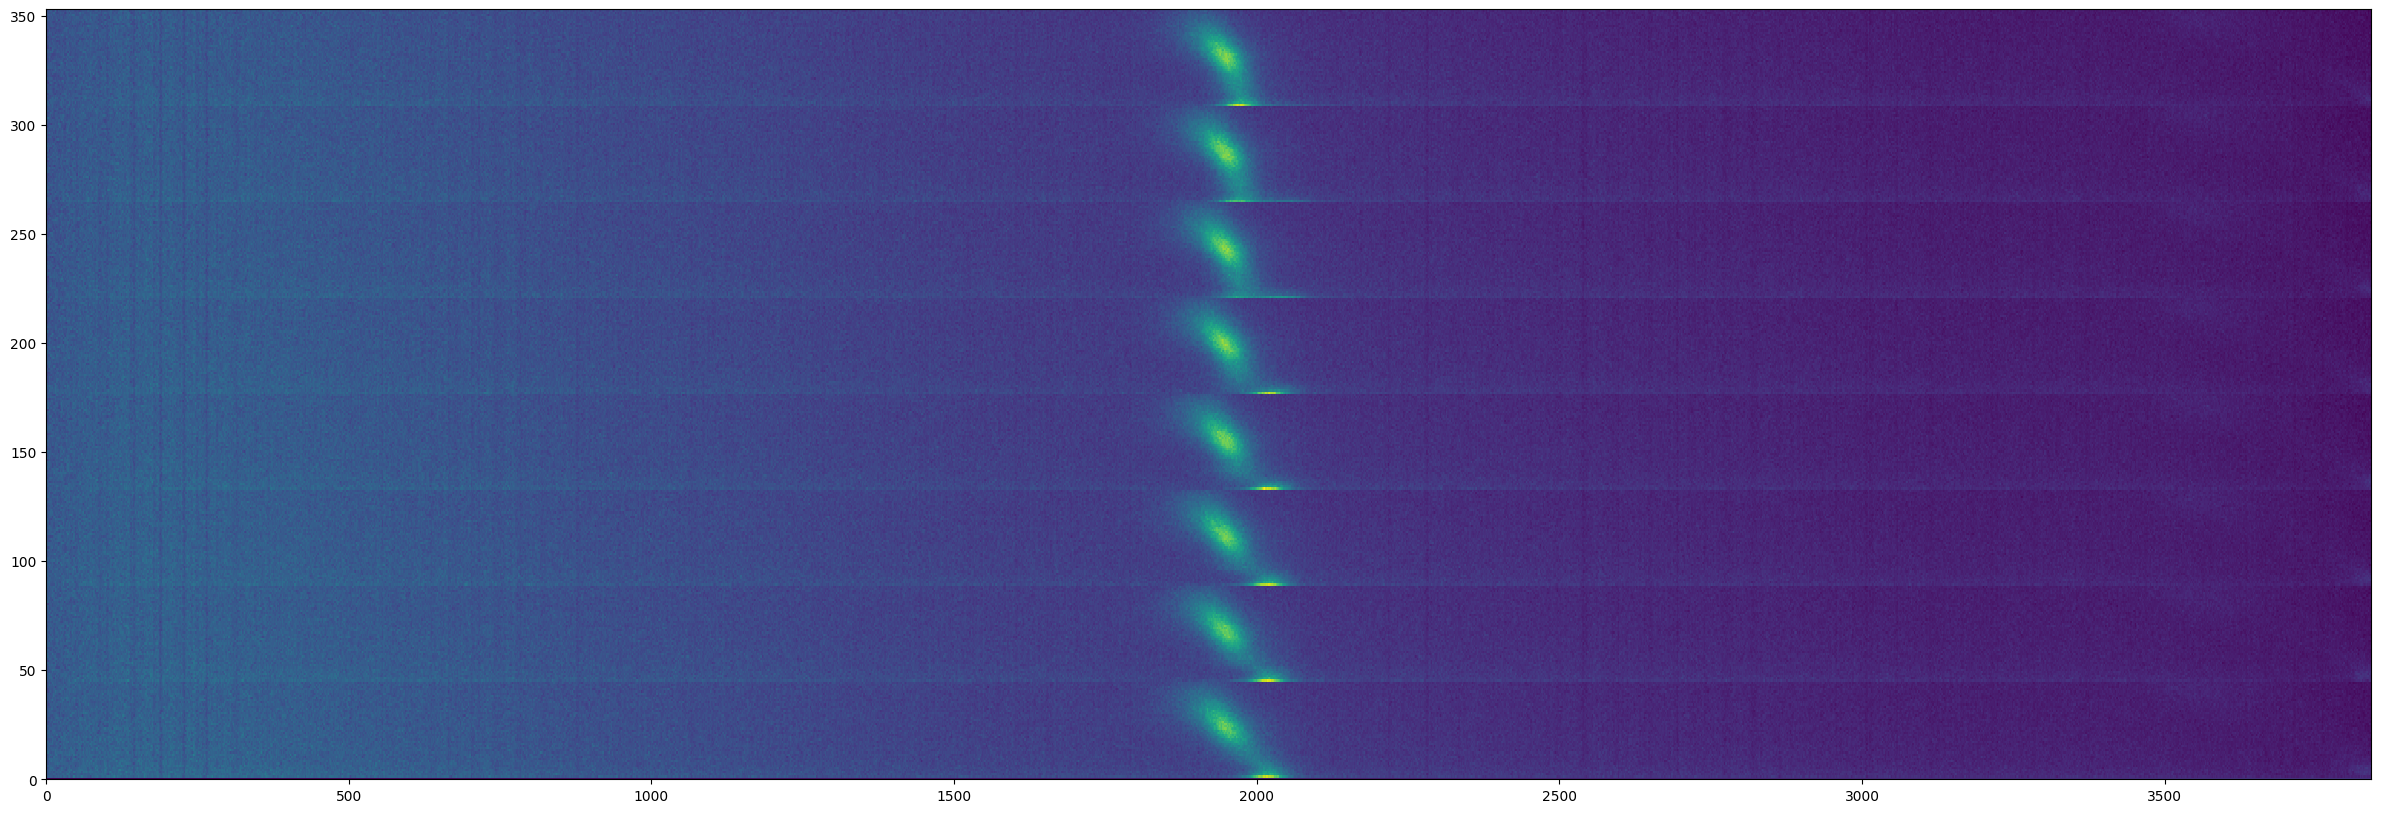

In [35]:
plt.figure(figsize=(30,10))
plt.pcolor(xrd_data)

In [36]:
from sklearn.metrics.pairwise import pairwise_distances
corr = pairwise_distances(xrd_data, metric='correlation')

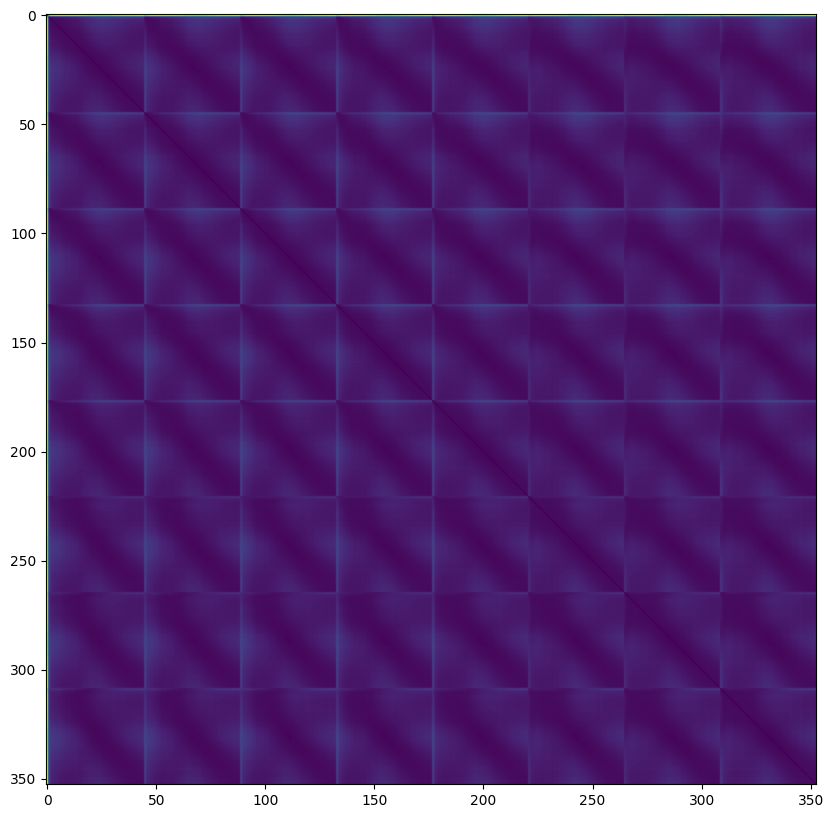

In [37]:
plt.figure(figsize=(30,10))
plt.imshow(corr)

Text(0, 0.5, 'Temperature (C)')

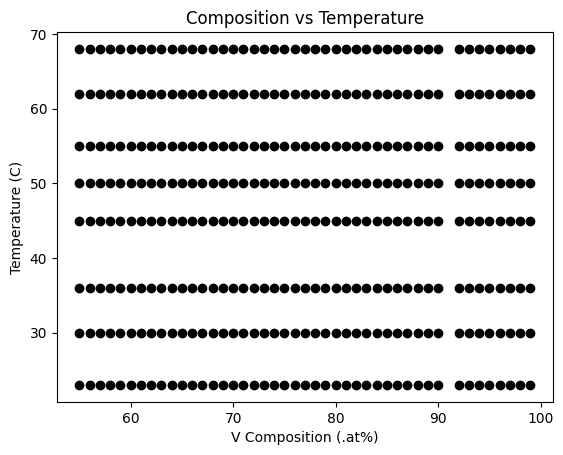

In [6]:
plt.figure()
plt.plot(temperature_data['V'],temperature_data['temp'],'ko')
plt.title('Composition vs Temperature')
plt.xlabel('V Composition (.at%)')
plt.ylabel('Temperature (C)')

In [7]:
value_to_find = 99
indexes = temperature_data.index[temperature_data['V'] == value_to_find].tolist()

In [26]:
indexes = [index+1 for index in indexes]

In [28]:
xrd_data_99 = xrd_data.iloc[indexes]

In [31]:
xrd_data_99.head()

0          1          2          3          4          5     \
1    51.848660  52.834038  51.174835  53.052490  56.399612  56.071865   
45   47.789474  50.064560  54.585587  53.612877  52.744526  52.705864   
89   58.279091  62.410358  60.628380  55.530041  53.779064  59.943947   
133  51.412682  49.963432  51.542789  50.013050  50.459843  51.379520   
177  58.585709  54.431068  50.358425  50.858067  55.361828  54.013485   

          6          7          8          9     ...       3831       3832  \
1    56.815231  56.848331  54.538723  53.689186  ...  30.001499  31.416891   
45   52.284763  49.374287  52.205151  56.234806  ...  32.130886  29.809732   
89   57.794819  53.171371  50.199165  49.221001  ...  29.646374  30.503382   
133  54.980000  58.021057  56.788094  54.220020  ...  31.322628  31.833887   
177  54.548317  53.619606  50.938103  50.735672  ...  27.006969  28.352562   

          3833       3834       3835       3836       3837       3838  \
1    32.066299  31.763731  29.936586  29.578611  30.885338  31.696762   
45   29.729586  29.319117  26.910076  27.089167  28.700663  31.056591   
89   33.218376  32.842819  29.668304  28.923542  31.402205  31.943592   
133  31.025780  31.273111  31.742310  31.266066  30.025261  29.517845   
177  29.165667  31.568859  32.603111  31.659271  30.114489  32.817204   

          3839       3840  
1    30.618622  30.386976  
45   33.117485  33.391644  
89   30.618084  30.795198  
133  33.201878  33.456100  
177  32.121273  29.113106  

[5 rows x 3841 columns]

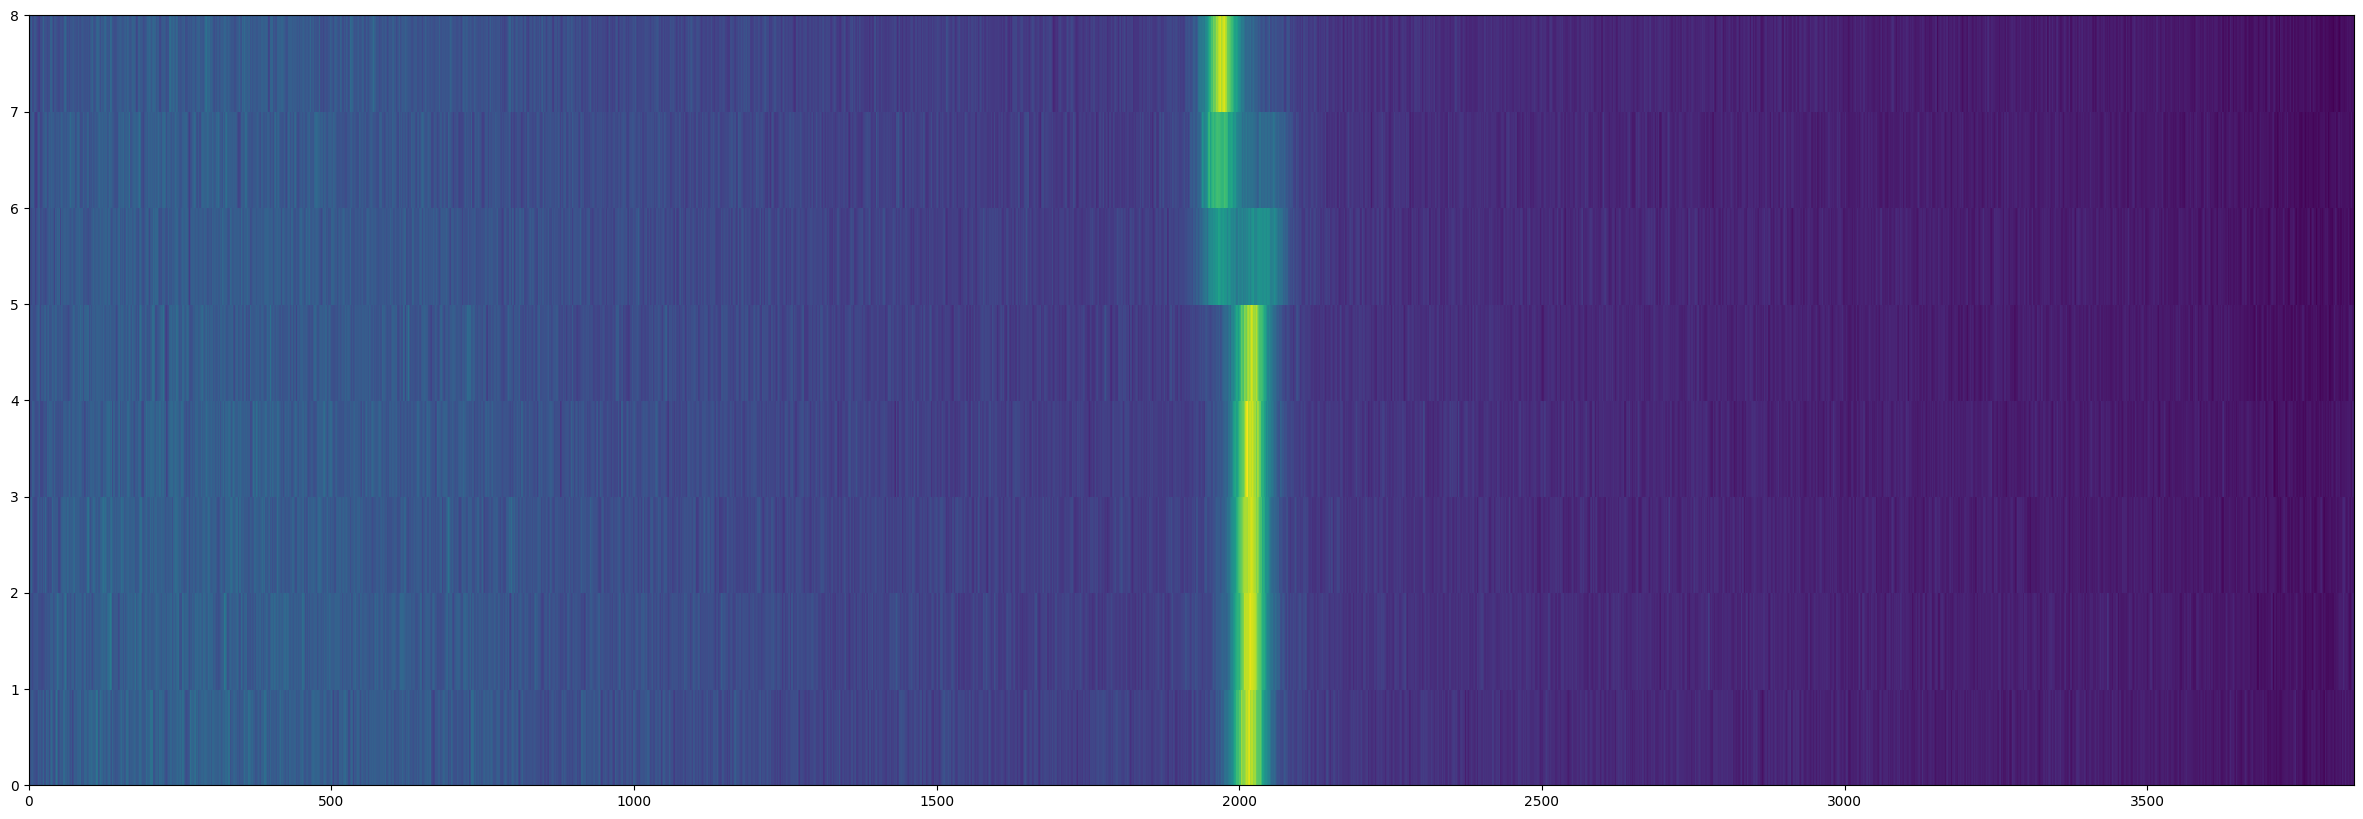

In [33]:
plt.figure(figsize=(30,10))
plt.pcolor(xrd_data_99)

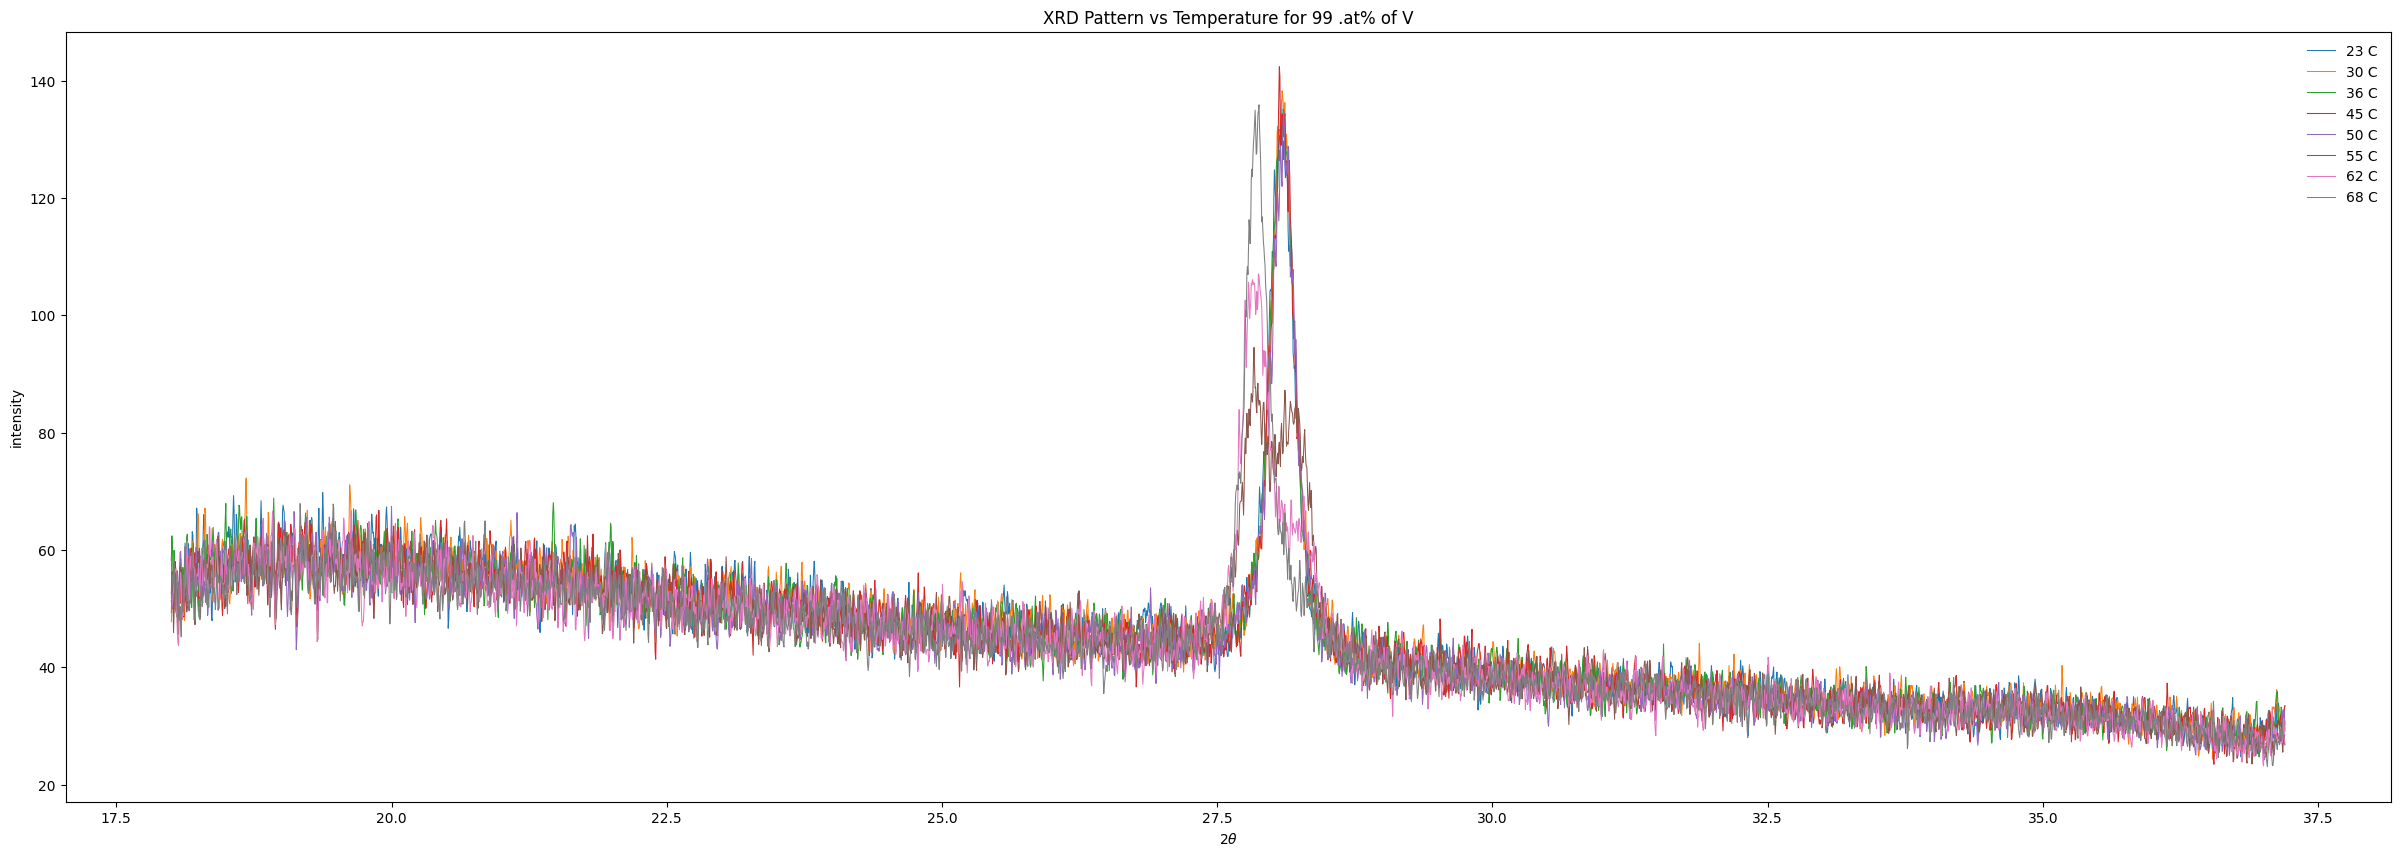

In [8]:
plt.figure(figsize=(30,10))
plt.title(r'XRD Pattern vs Temperature for 99 .at% of V')
plt.xlabel(r'2$\theta$')
plt.ylabel('intensity')
for index in indexes:
    plt.plot(thetas,
             xrd_data.iloc[index+1],
             label=f'{temperature_data["temp"][index]} C',
             linewidth = 0.75)#index + 1 used as we read in xrd data with header = None
plt.legend(loc='upper right', frameon=False);

In [16]:
value_to_find = 23
indexes_2 = temperature_data.index[temperature_data['temp'] == value_to_find].tolist()

In [17]:
indexes_2 = [index+1 for index in indexes_2]

In [22]:
xrd_data_23 = xrd_data.iloc[indexes_2]

In [25]:
xrd_data_23.head()

0          1          2          3          4          5     \
1  51.848660  52.834038  51.174835  53.052490  56.399612  56.071865   
2  56.722721  53.881912  50.671062  51.321934  51.556866  52.253277   
3  58.148319  52.507820  49.679859  50.496136  54.162167  56.740105   
4  51.148743  51.590397  55.766472  53.936325  52.004356  55.977509   
5  56.481380  52.678493  49.691280  48.899235  50.078491  53.187347   

        6          7          8          9     ...       3831       3832  \
1  56.815231  56.848331  54.538723  53.689186  ...  30.001499  31.416891   
2  55.718475  54.416790  51.783272  52.114933  ...  36.225739  36.308441   
3  57.224972  57.081902  54.456417  51.681507  ...  35.979317  36.018536   
4  56.503899  55.611641  57.211300  57.517410  ...  36.787567  34.973251   
5  55.538841  56.982971  59.650421  60.144733  ...  36.955875  37.824177   

        3833       3834       3835       3836       3837       3838  \
1  32.066299  31.763731  29.936586  29.578611  30.885338  31.696762   
2  36.801197  34.759724  33.528366  32.918938  33.996967  37.048428   
3  37.044678  37.575008  36.818207  35.648510  34.063965  35.145317   
4  35.419075  34.981800  35.143005  33.491112  34.419773  35.162094   
5  39.030418  39.253719  38.017082  36.436962  34.331112  33.690659   

        3839       3840  
1  30.618622  30.386976  
2  36.566868  32.096848  
3  36.675240  35.317139  
4  34.798779  34.817390  
5  34.349812  32.904148  

[5 rows x 3841 columns]

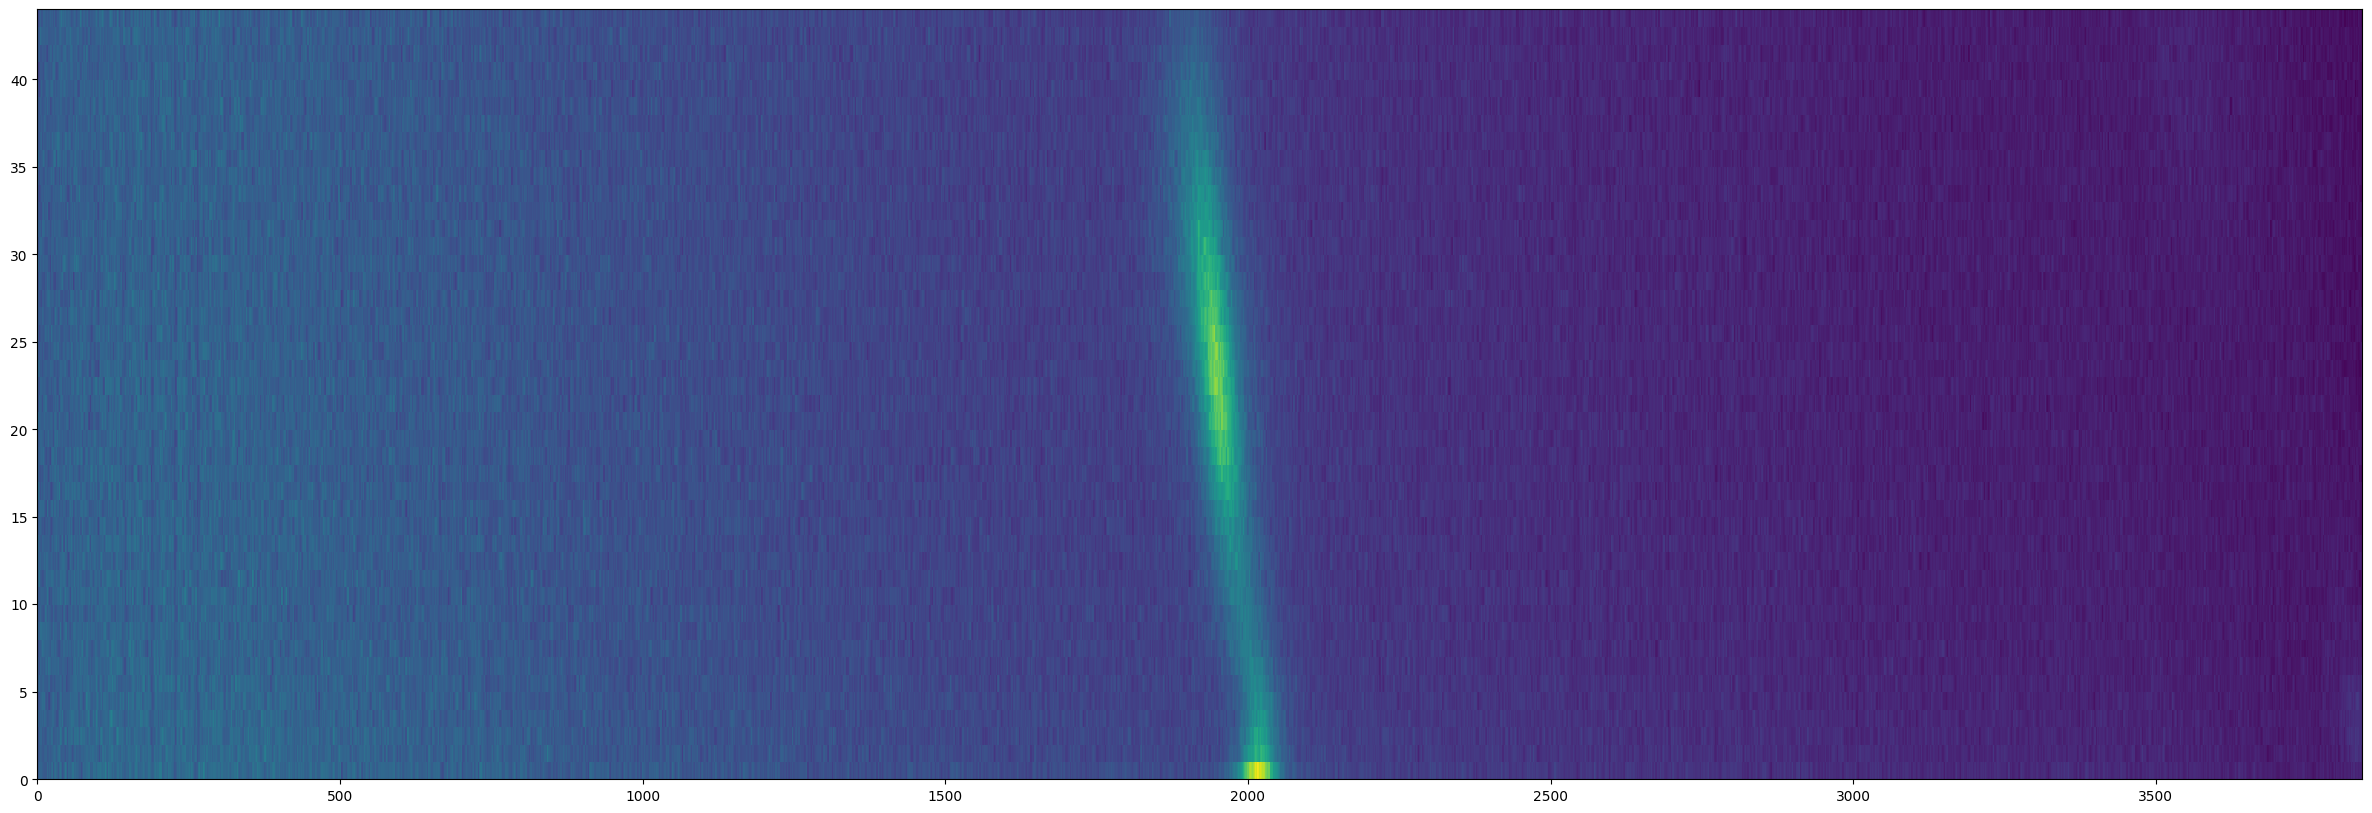

In [34]:
plt.figure(figsize=(30,10))
plt.pcolor(xrd_data_23)

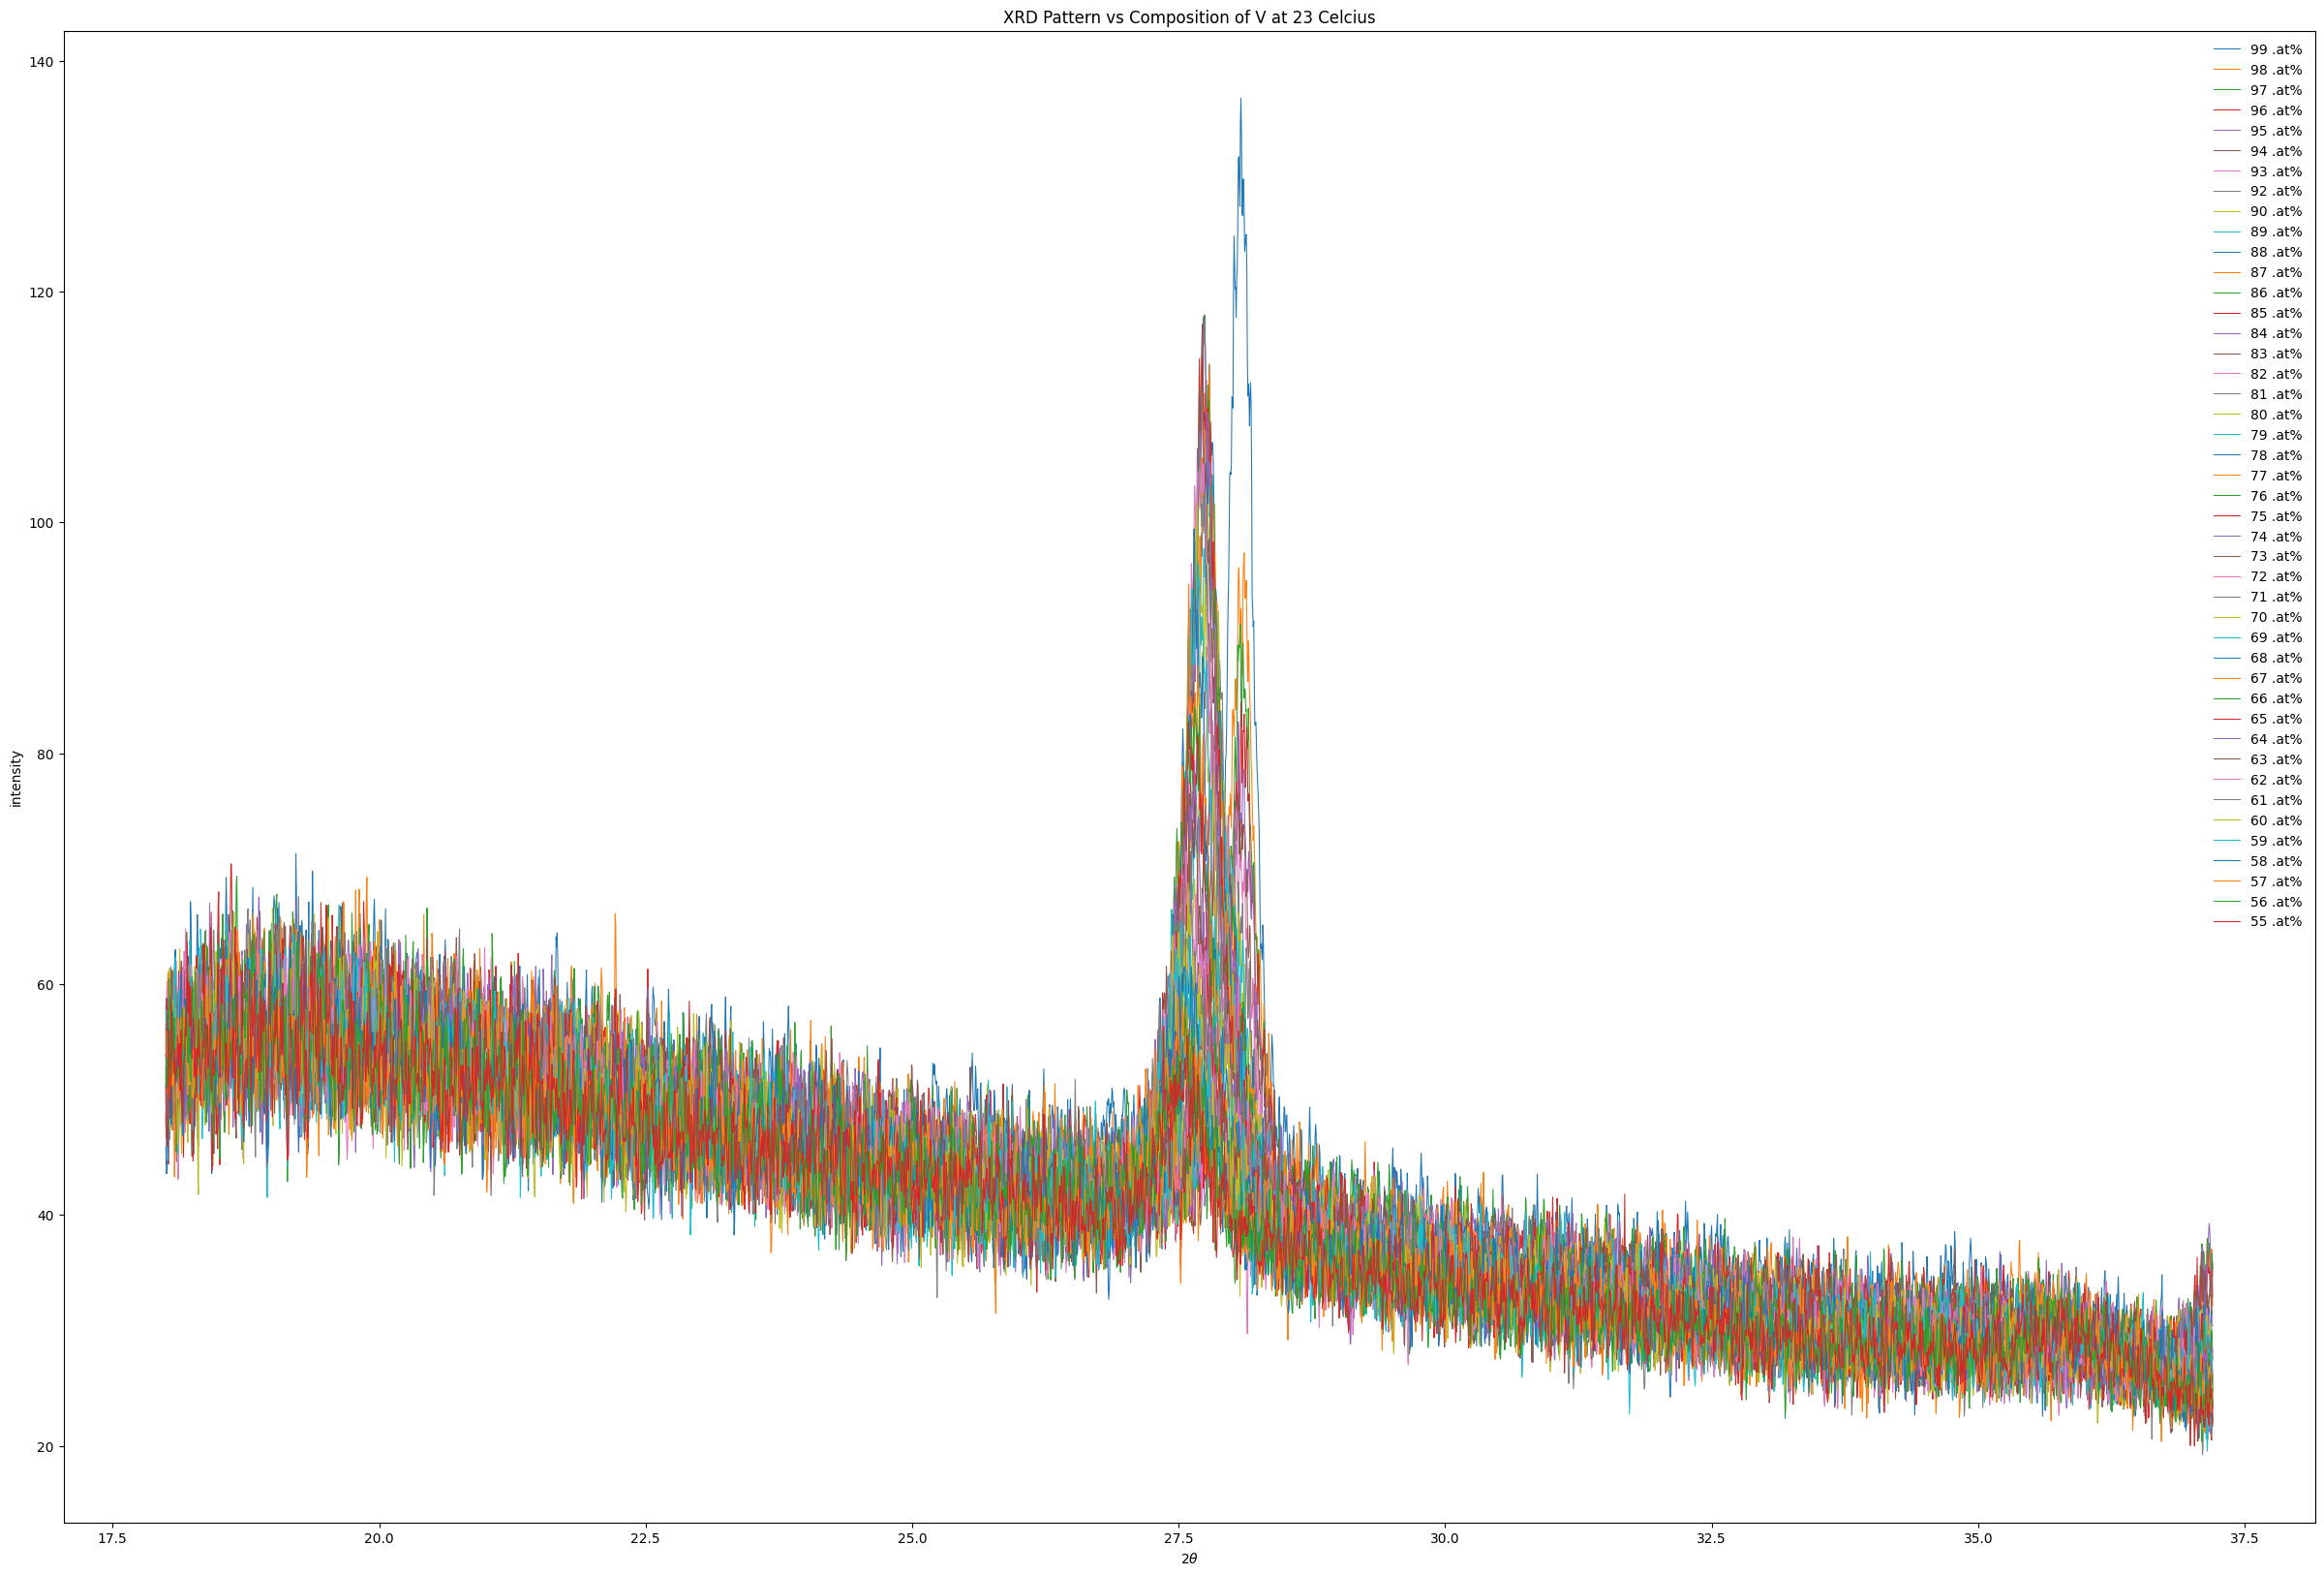

In [14]:
plt.figure(figsize=(30,20))
plt.title(r'XRD Pattern vs Composition of V at 23 Celcius')
plt.xlabel(r'2$\theta$')
plt.ylabel('intensity')
for index in indexes_2:
    plt.plot(thetas,
             xrd_data.iloc[index+1],
             label=f'{temperature_data["V"][index]} .at%',
             linewidth = 0.75)#index + 1 used as we read in xrd data with header = None
plt.legend(loc='upper right', frameon=False);

In [73]:
xrd_data = xrd_data.iloc[1:]

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True,with_std=True)
xrd_data_scaled = xrd_data
#xrd_data_scaled = scaler.fit_transform(xrd_data)

In [100]:
from sklearn.decomposition import PCA
pca_xrd = PCA()

In [101]:
pca_xrd.fit(xrd_data_scaled);

In [102]:
len(pca_xrd.mean_)

3841

In [103]:
scores = pca_xrd.transform(xrd_data_scaled)

In [121]:
scores.shape

(352, 352)

In [104]:
pca_xrd.components_

array([[ 0.00352848,  0.00480999,  0.00491754, ...,  0.01661506,
         0.01627342,  0.0159627 ],
       [ 0.0050293 ,  0.00683674,  0.00615703, ...,  0.00920068,
         0.00988803,  0.01010546],
       [ 0.00762683,  0.00495706,  0.00409319, ...,  0.00770878,
         0.0072637 ,  0.0070293 ],
       ...,
       [ 0.01057573,  0.01887299, -0.02518107, ...,  0.01650197,
        -0.00271478, -0.02117623],
       [-0.00323779,  0.00488841, -0.0091153 , ..., -0.00363391,
        -0.0266341 , -0.02245676],
       [-0.0270815 ,  0.03813835,  0.00674962, ..., -0.01674514,
        -0.01259323,  0.00789132]])

Text(0, 0.5, 'PC2')

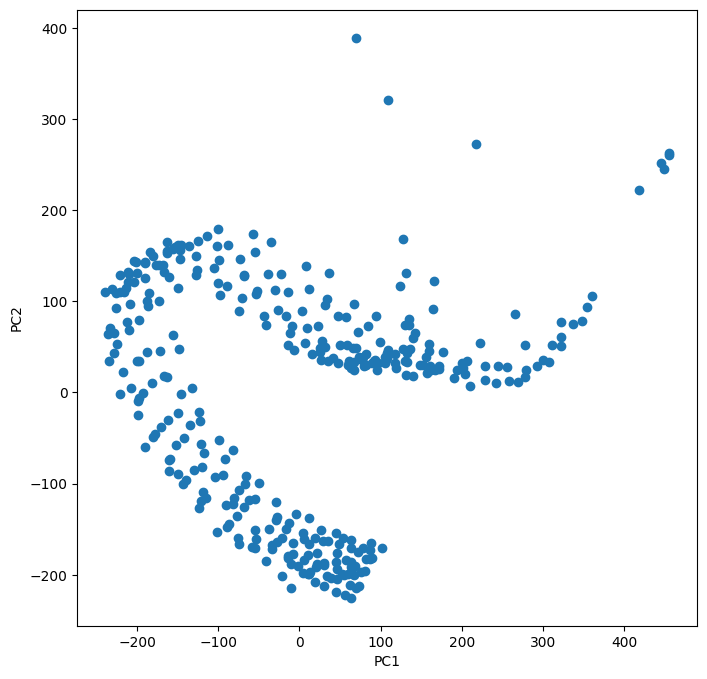

In [113]:
i, j = 0, 1 # which components
fig , ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:,0], scores[:,1])
ax.set_xlabel('PC%d' % (i+1))
ax.set_ylabel('PC%d' % (j+1))


In [111]:
pca_xrd.explained_variance_[:5]

array([22114.96456923, 15450.17419482,  5791.08621153,   957.18193263,
         513.00414379])

In [112]:
pca_xrd.explained_variance_ratio_[:5]

array([0.33694855, 0.23540231, 0.08823429, 0.01458384, 0.00781625])

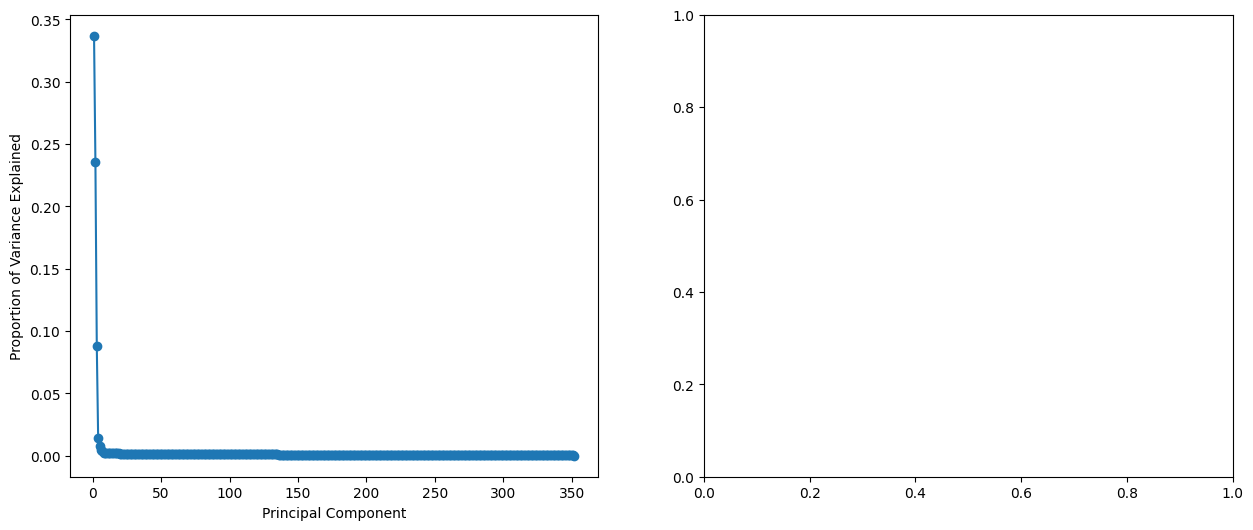

In [118]:
fig , axes = plt.subplots(1, 2, figsize=(15, 6));
ticks = np.arange(pca_xrd.n_components_)+1;
ax = axes[0];
ax.plot(ticks,pca_xrd.explained_variance_ratio_ ,marker='o');
ax.set_xlabel('Principal Component');
ax.set_ylabel('Proportion of Variance Explained');


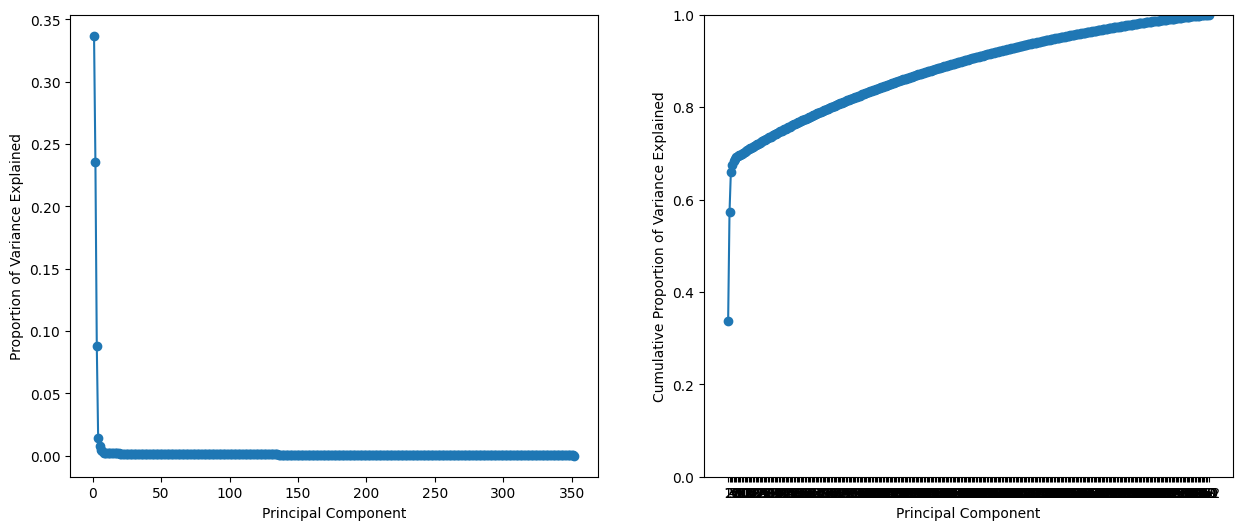

In [109]:
ax = axes[1]
ax.plot(ticks ,pca_xrd.explained_variance_ratio_.cumsum(),marker='o')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Cumulative Proportion of Variance Explained')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

find the index of row where at.% of V is 99 and plot xrd data of that

generate xray diffraction vs composition plots of temp 23 - multiples?

PCA or t-SNE and total explained varienve to drop noise

false color plot in the reduced dimmensional space

clustering to attempt to get phase regions as similar as possible to the graph given in the pdf

<font size=12>Summary</font>

What worked?
- different things to compare - tsne and pca for dimensional reduction and noise removal
- different parameters given to the clustering methods

-future things:
    -maybe a reduction in the diffraction features due to symmetry?